## Dogs vs Cats Convolutional Neural Networks Classification

### Problem Statement: 

In this Code,  we are implementing Convolution Neural Network (CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 2,000 and final testing is done on seperate 400 images.

This Dataset is taken from this [link](https://drive.google.com/drive/u/0/folders/1dZvL1gi5QLwOGrfdn9XEsi4EnXx535bD)

### Dependencies 
 - Jupyter Notebook
 - Tensorflow
 - Python 3.6
 - Matplotlib
 - Seaborn
 - Scikit-Learn
 - Pandas
 - Numpy

### Test-Train Split
Image training set contain 2400 images for each category. I split those into 80% train and 20% means test Split each class images into 2000 for train and 400 for test.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


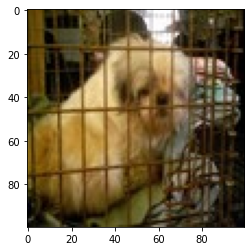

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

MODEL TRAINING

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 11s 342ms/step - loss: 0.1435 - accuracy: 0.9570
Epoch 2/5
32/32 [==============================] - 11s 343ms/step - loss: 0.0969 - accuracy: 0.9750
Epoch 3/5
32/32 [==============================] - 11s 346ms/step - loss: 0.0706 - accuracy: 0.9840
Epoch 4/5
32/32 [==============================] - 11s 340ms/step - loss: 0.0721 - accuracy: 0.9845
Epoch 5/5
32/32 [==============================] - 11s 340ms/step - loss: 0.0347 - accuracy: 0.9955


In [13]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 58ms/step - loss: 1.1594 - accuracy: 0.6875


[1.1594334840774536, 0.6875]

MAKE PREDICTIONS

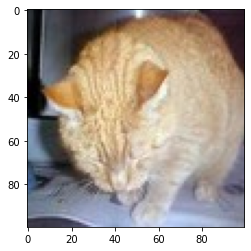

1/1 [==============================] - 0s 21ms/step
Our model says it is a : dog
0.0


In [18]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)